#### Useful imports

In [47]:
#Useful imports 
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib as mpl

import seaborn as sn

pd.options.display.max_columns = 500

#### Useful dictionnaries

In [48]:
catégorie = ["Medical, Illness & Healing", "Funerals & Memorials", "Accidents & Emergencies","Non-Profits & Charities","Education & Learning", "Animals & Pets", "Environment", "Business & Entrepreneurs","Community & Neighbors", "Competitions & Pageants","Creative Arts, Music & Film", "Celebrations & Events","Missions, Faith & Church", "Babies, Kids & Family", "Sports, Teams & Clubs", "Travel & Adventure","Volunteer & Service", "Dreams, Hopes & Wishes", "Other"]

dict_category=dict()
for i in range(len(catégorie)):
    dict_category[i]=catégorie[i]

n = len(catégorie)

dict_category

{0: 'Medical, Illness & Healing',
 1: 'Funerals & Memorials',
 2: 'Accidents & Emergencies',
 3: 'Non-Profits & Charities',
 4: 'Education & Learning',
 5: 'Animals & Pets',
 6: 'Environment',
 7: 'Business & Entrepreneurs',
 8: 'Community & Neighbors',
 9: 'Competitions & Pageants',
 10: 'Creative Arts, Music & Film',
 11: 'Celebrations & Events',
 12: 'Missions, Faith & Church',
 13: 'Babies, Kids & Family',
 14: 'Sports, Teams & Clubs',
 15: 'Travel & Adventure',
 16: 'Volunteer & Service',
 17: 'Dreams, Hopes & Wishes',
 18: 'Other'}

# ANALYSING

## III.I/Let's look at our data:

In [49]:
df =pd.read_csv('datacleaned.csv')

In [50]:
df.iloc[:,1:11].describe()

,Pourcentage Raised,NumberDonors,Duration in days,Amount collected,Amount targeted,MeanDonation
count,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,17.601477,10.357955,58.423864,493.996591,2647.798864,21.940188
std,28.310597,33.392421,68.824412,1797.250918,3736.577235,32.148600
min,1.000000,0.000000,6.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,15.000000,0.000000,500.000000,0.000000
50%,1.700000,1.000000,36.000000,20.000000,1500.000000,14.083333
75%,22.275000,8.000000,72.000000,220.000000,3000.000000,30.479167
max,100.000000,494.000000,371.000000,19145.000000,25000.000000,297.063492


### III.I.1/ 'Duration in days' of collects

In [51]:
df['Duration in days'].describe()

count    880.000000
mean      58.423864
std       68.824412
min        6.000000
25%       15.000000
50%       36.000000
75%       72.000000
max      371.000000
Name: Duration in days, dtype: float64

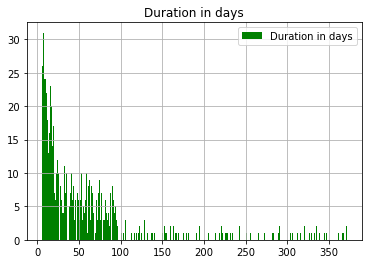

In [52]:
plt=df.hist(column='Duration in days', bins=400, legend=True, color='g')

<AxesSubplot:title={'center':'Mean of duration per category'}, xlabel='Categorie'>

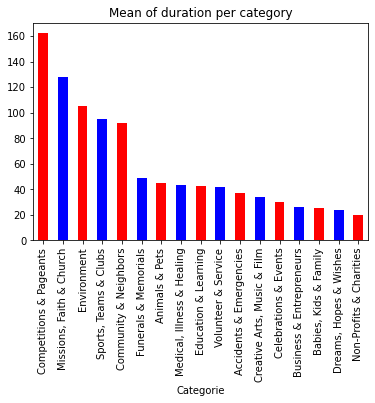

In [53]:
df.groupby('Categorie')['Duration in days'].mean().nlargest(n).plot.bar( color=['r','b'],title='Mean of duration per category')

##### We had selected the 96 'most popular' collects (as presented by the website) for each category
##### They are mostly recent (50% < a month)
##### It's relevant to note that some categories like 'Charities' have a turnover much bigger than 'Missions and Faith' for example

### III.1.2.2/ Amount targeted 

In [54]:
df['Amount targeted'].describe()

count      880.000000
mean      2647.798864
std       3736.577235
min          1.000000
25%        500.000000
50%       1500.000000
75%       3000.000000
max      25000.000000
Name: Amount targeted, dtype: float64

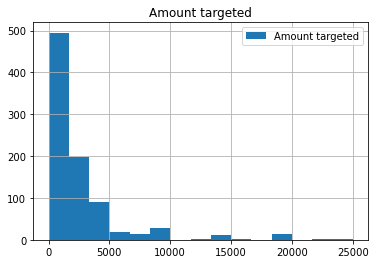

In [55]:
plt=df.hist(column='Amount targeted', bins=15, legend= True);

<AxesSubplot:title={'center':'Means of amount targeted'}, xlabel='Categorie'>

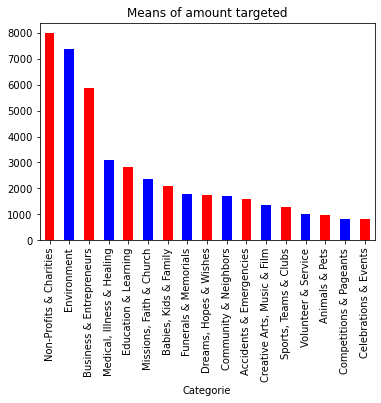

In [56]:
df.groupby('Categorie')['Amount targeted'].mean().nlargest(n).plot.bar(color=['r','b'],title='Means of amount targeted')

### III.1.2.2/ Amount collected 

In [57]:
df['Amount collected '].describe()

count      880.000000
mean       493.996591
std       1797.250918
min          0.000000
25%          0.000000
50%         20.000000
75%        220.000000
max      19145.000000
Name: Amount collected , dtype: float64

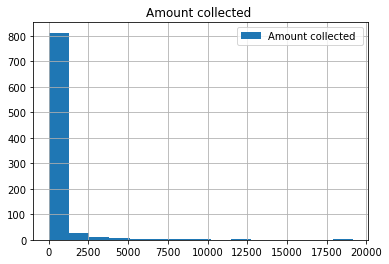

In [58]:
plt=df.hist(column='Amount collected ', bins=15, legend= True);

<AxesSubplot:title={'center':'Means of amount collected'}, xlabel='Categorie'>

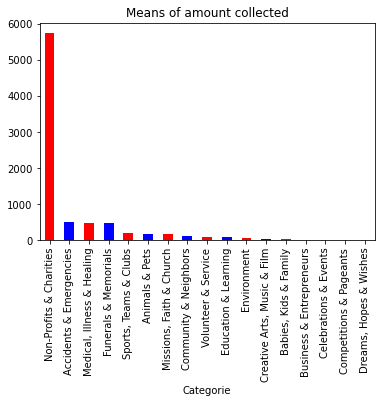

In [59]:
df.groupby('Categorie')['Amount collected '].mean().nlargest(n).plot.bar(color=['r','b'],title='Means of amount collected')

##### The amount raised depended 

### III.1.3/Analysis of the number of donors

In [60]:
df['NumberDonors'].describe()

count    880.000000
mean      10.357955
std       33.392421
min        0.000000
25%        0.000000
50%        1.000000
75%        8.000000
max      494.000000
Name: NumberDonors, dtype: float64

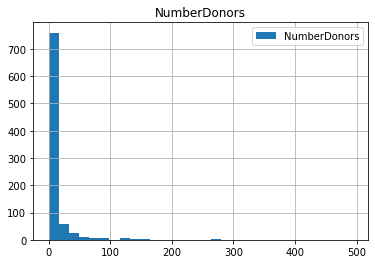

In [61]:
plt=df.hist(column='NumberDonors', bins=30, legend= True);

<AxesSubplot:title={'center':'Means of amount collected'}, xlabel='Categorie'>

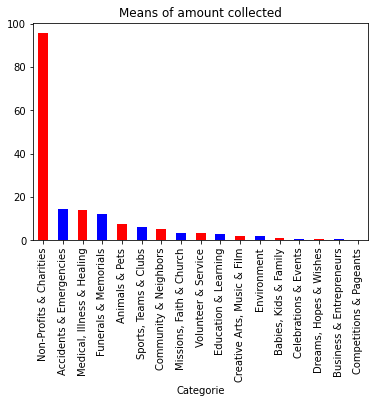

In [62]:
df.groupby('Categorie')['NumberDonors'].mean().nlargest(n).plot.bar(color=['r','b'],title='Means of amount collected')

### III.1.4/ Analysis of the 'Pourcentage raised' of the targeted amount of collects

In [63]:
df['Pourcentage Raised'].describe()

count    880.000000
mean      17.601477
std       28.310597
min        1.000000
25%        1.000000
50%        1.700000
75%       22.275000
max      100.000000
Name: Pourcentage Raised, dtype: float64

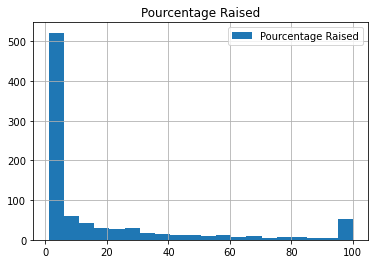

In [64]:
plt=df.hist(column='Pourcentage Raised', bins=20, legend= True);

<AxesSubplot:title={'center':'Means of amount collected'}, xlabel='Categorie'>

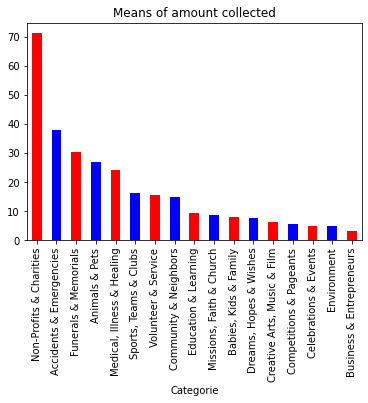

In [65]:
df.groupby('Categorie')['Pourcentage Raised'].mean().nlargest(n).plot.bar(color=['r','b'],title='Means of amount collected')

AttributeError: 'numpy.ndarray' object has no attribute 'title'

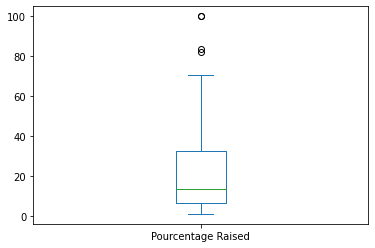

In [68]:
for i in range (n-1):
    df.loc[df['Categorie']==dict_category[i]]['Pourcentage Raised'].plot.box()
    plt.title(catégorie[i])
    plt.show()

## III.2/ How can we use the description of a project ?

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thomaslance/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### III.2.1/ First, collect the most occurent (and relevant) words (=the keywords) in descriptions par category

In [ ]:
#We look at the words with the greatest occurences for each category (open 'occurences' file )
from collections import Counter
txt=[]
for cat in catégorie:
    list1=[]
    for e in df.loc[(df['Categorie'] ==cat)]['Short_description']:
        list1=list1+word_tokenize(e)
    counts = Counter(list1)
    txt.append(cat)
    txt.append("      ")
    txt.append(counts)


with open('occurences.txt', 'w') as f:
    for item in txt:
        f.write("%s\n" % item)

### III.2.2/ Then, create a dictionnary with the "keywords" of each category

In [ ]:
#We list the words of occurences that are keywords, which means the ones with a signification linked with the category

motsclés1=[[' douleur, association, funds, générosité, surgery, financier, remercie, disease, cancer, traitements, opération, besoin,enfant, mère '], 
[' family, obsèques, children, soutien, remercie, enterrement, hopital, association, community, maman '],
[' typhon, community, home, treatment, soutien, reconstruire, destroyed, maison, father, famille '],
[' support, community, together, children, foundation, students, animal, organization, cause, education, property, building '],
[' school, France, children, formation, yhèse, étude, construction, association, classe, famille '],
[' vétérinaire, opération, chien, frais, traitements, sauver, chimiothérapie, chat, examens, chevaux '],
[ ' association, environnement, société, développement, qualité, paris, climate, change, sensibiliser, scientifique, électricité »'],
[' agricole, communication, restaurant, investissement, agriculture, business, social, objectif, activité, professionnelle '],
[' vaccination, family, community, water, business, needs, health '],
[' compétition, championnat, international, opportunity, formation, passion, métrage, vidéo, réalisation, training ' ],
[ ' association, computer, vidéo, ordinateur, album, montage, formation, documentary ' ],
[ ' festival, conference, transpersonnalité, musique, climate, justice, agreement, anniversaire '],
[ ' mission, community, christ, church, évangélisation, voyage, prayer, christians, orphanages '],
[ ' famille, maison, besoin, place, cancer, association, logement, travaux, children ' ],
[ ' coach, tennis, equipments, soccer, Olympic, academy, club, basketball, soccer, volleyball, ironman ' ],
[ ' voyage, dream, equipment, découvrir, trail, aventure, vidéo, professionnelle, birthday ' ],
[ ' enfants, villages, typhon, association, education, maisons, acheter, christmas, nourrir ' ],
[ ' refugee, voyage, meditation, pédagogique, besoin, school, program '],
[]
          ]
motsclés=[]

for e in motsclés1:
    motsclés.append(word_tokenize(str(e).replace(',','').replace('[','').replace(']','').replace('"','').replace("'" ,'')))

###

#We create a dictionnary linking a category and the keywords linked with it
motclé_dict=dict()
#catégorie is defined in II.8/
for i in range(len(catégorie)):
    motclé_dict[catégorie[i]]=motsclés[i]

In [ ]:

#We create a dictionnary linking a category and its number
dict_category=dict()
#catégorie is defined in II.8/
for i in range(len(catégorie)):
    dict_category[i]=catégorie[i]

### III.2.3/ Then create a colum 'ScoreWord' per collecting, counting the number of keywords in the description

In [ ]:
#This function counts the occurences of the words of a list1 in another list2.
def countword(list1, list2):
    occu=dict()
    for word in list1:
        #print(word)
        occu[word]=list2.count(word)
    return occu



In [ ]:
#This function counts the numbers of matching words from the description (list1) with the keywords of the category(list2)
def scoreWord(index):
    sum=0
    count=countword(motclé_dict[df['Categorie'][index]],df['Short_description'][index])
    for e in count:
        sum+=count[e]
    return sum 

#We create a column scoreword
scoreword=[]
for i in range(len(df['Short_description'])):
    scoreword.append(int(scoreWord(i)))
df['ScoreWord']=scoreword

### Analysis of ScoreWord

Distribution of ScoreWord:


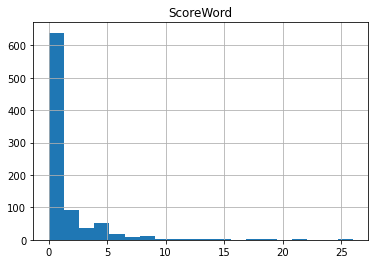

In [ ]:
print('Distribution of ScoreWord:')

plt=df.hist(column='ScoreWord', bins=20)

<AxesSubplot:title={'center':'Means of amount collected'}, xlabel='Categorie'>

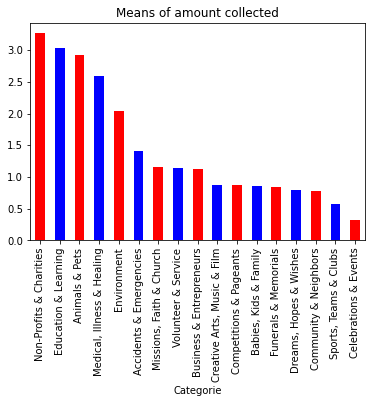

In [ ]:
df.groupby('Categorie')['ScoreWord'].mean().nlargest(n).plot.bar(color=['r','b'],title='Means of amount collected')

## III.3 What are the important factors in the success of a collect:
## OLS ANALYSIS

In [ ]:
import seaborn as sn
import statsmodels.api as sm
import matplotlib.pyplot as plt


def OLS_per_category_with_keywords(cat,covariates):
    
    df2=df.loc[df['Categorie']==cat]

###KEYWORDS
    #Create columns "description contains or not the keyword"
    for keyword in motclé_dict[cat]:
        list=[]
        for collect_description in df2['Short_description']:
            if keyword in collect_description:
                list.append(1)
            else:
                list.append(0)
        df2[keyword]=list
    
### CORRELATION MATRIX
    plt.figure(figsize=(10,10))
    corrMatrix = df2[covariates+motclé_dict[cat]+['Amount collected ']].corr()
    sn.heatmap(corrMatrix, annot=True, square=True).set_title(cat+" Correlation matrix with Amount Collected, keywords and "+(str(covariates)))



###OLS
    X = df2[covariates+(motclé_dict[cat])]
    Y=df2['Pourcentage Raised']

    model = sm.OLS(Y, X)
    results = model.fit()
    #print(results.params)
    
    #OLS PLOT
    fig, ax = plt.subplots(figsize=(10,10))
    fig = sm.graphics.plot_fit(results, 0, ax=ax)
    ax.set_ylabel("Amount collected")
    ax.set_xlabel(covariates)
    ax.set_title(cat+"OlS Regression with keywords and "+(str(covariates)))
    
    print(results.summary())
    
####################



def OLS_per_category(cat,covariates):
    
    df2=df.loc[df['Categorie']==cat]

###KEYWORDS
    #Create columns "description contains or not the keyword"
    for keyword in motclé_dict[cat]:
        list=[]
        for collect_description in df2['Short_description']:
            if keyword in collect_description:
                list.append(1)
            else:
                list.append(0)
        df2[keyword]=list
    
### CORRELATION MATRIX
    plt.figure(figsize=(5,5))
    corrMatrix = df2[covariates+['Amount collected ']].corr()
    sn.heatmap(corrMatrix, annot=True, square=True).set_title(cat+" Correlation matrix with Amount Collected, keywords and "+(str(covariates)))



###OLS
    X = df2[covariates]
    Y=df2['Amount collected ']

    model = sm.OLS(Y, X)
    results = model.fit()
    #print(results.params)
    
    #OLS PLOT
    fig, ax = plt.subplots(figsize=(10,10))
    fig = sm.graphics.plot_fit(results, 0, ax=ax)
    ax.set_ylabel("Amount collected")
    ax.set_xlabel(covariates)
    ax.set_title(cat+" OlS Regression with keywords and "+(str(covariates)))
    
    print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:      Amount collected    R-squared (uncentered):                   0.904
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              239.8
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    1.15e-26
Time:                        09:37:43   Log-Likelihood:                         -353.14
No. Observations:                  53   AIC:                                      710.3
Df Residuals:                      51   BIC:                                      714.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


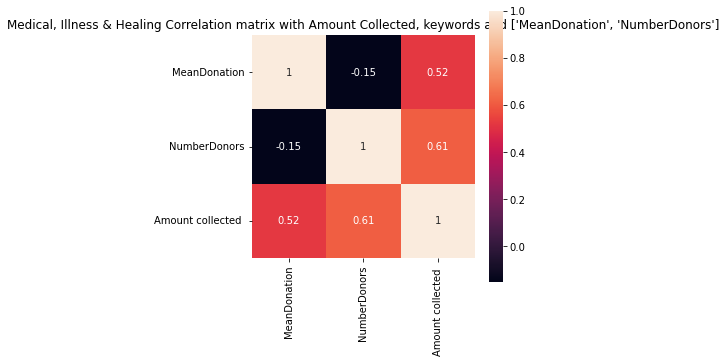

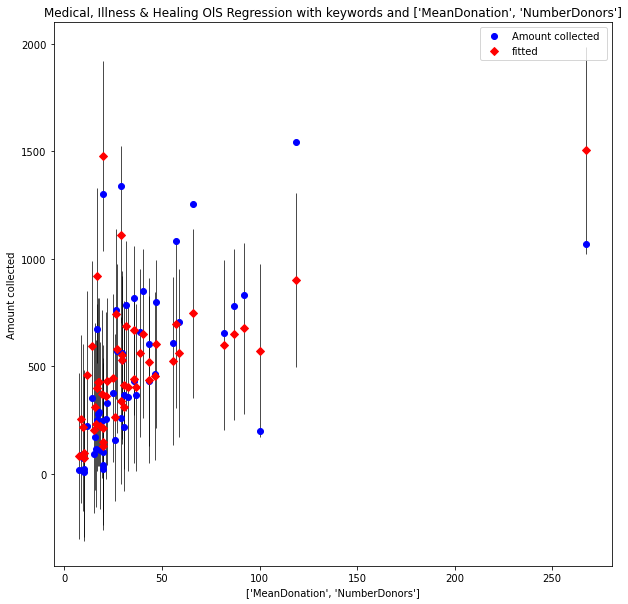

In [ ]:
OLS_per_category(dict_category[0],['MeanDonation','NumberDonors'])

#### Obviously, the greater the mean donation and number of donators of a collect are , the more successful is the collect

                                 OLS Regression Results                                
Dep. Variable:      Amount collected    R-squared (uncentered):                   0.566
Model:                            OLS   Adj. R-squared (uncentered):              0.557
Method:                 Least Squares   F-statistic:                              67.76
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    5.49e-11
Time:                        09:37:43   Log-Likelihood:                         -393.10
No. Observations:                  53   AIC:                                      788.2
Df Residuals:                      52   BIC:                                      790.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


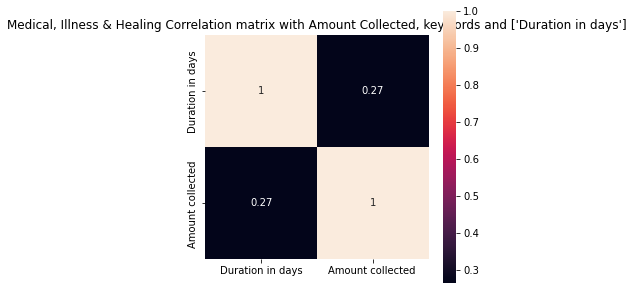

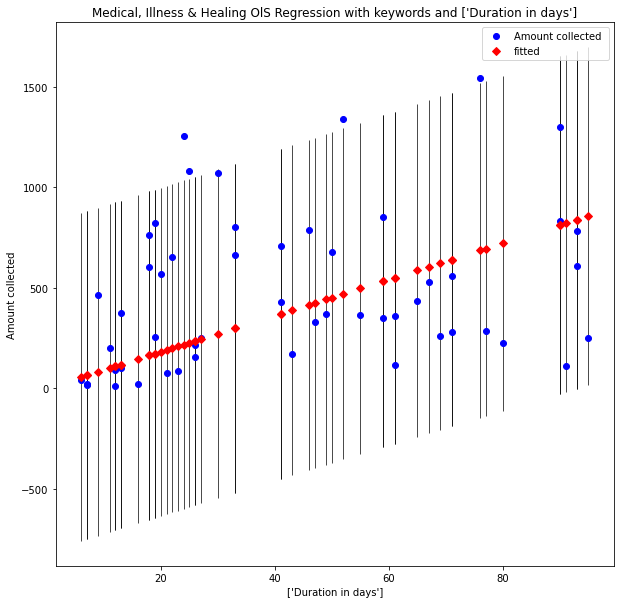

In [ ]:
OLS_per_category(dict_category[0],['Duration in days'])

#### The correlation between 'Duration in days' and the amount collected is low but globally, the longer, the better 

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              3.461
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                     0.00390
Time:                        09:37:43   Log-Likelihood:                         -247.88
No. Observations:                  49   AIC:                                      511.8
Df Residuals:                      41   BIC:                                      526.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

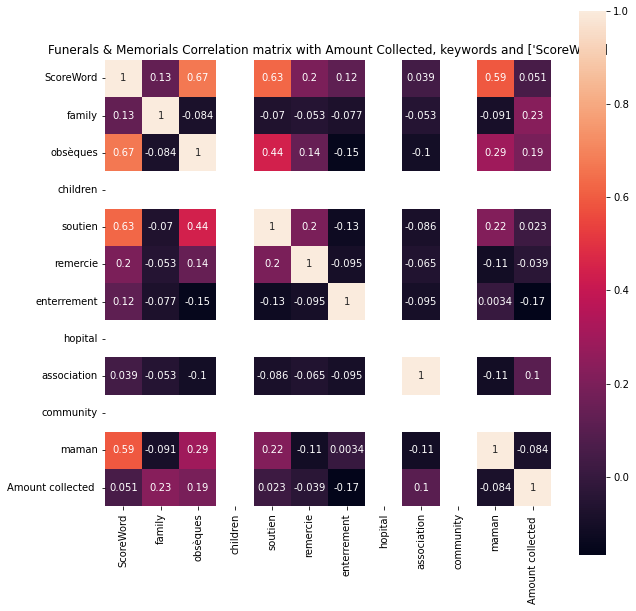

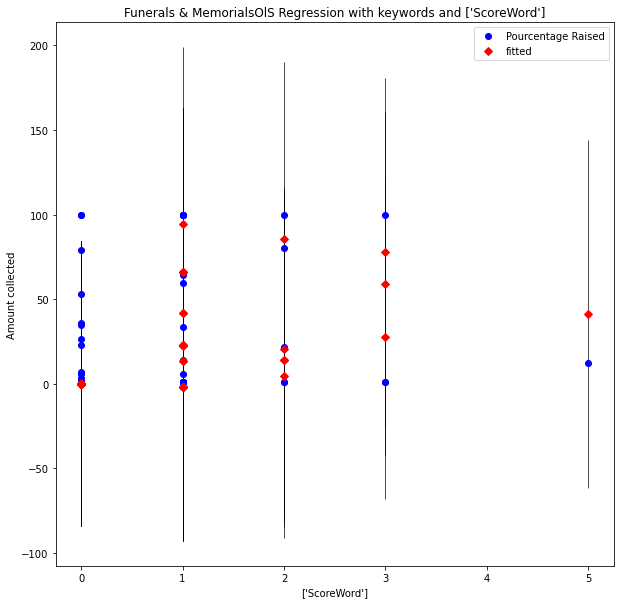

In [ ]:
OLS_per_category_with_keywords(dict_category[1],['ScoreWord'])

#### In effect, Duration in days, compared to NumberDonors, have a little influence 

                                 OLS Regression Results                                
Dep. Variable:      Amount collected    R-squared (uncentered):                   0.093
Model:                            OLS   Adj. R-squared (uncentered):              0.074
Method:                 Least Squares   F-statistic:                              4.911
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                      0.0315
Time:                        09:37:44   Log-Likelihood:                         -410.70
No. Observations:                  49   AIC:                                      823.4
Df Residuals:                      48   BIC:                                      825.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


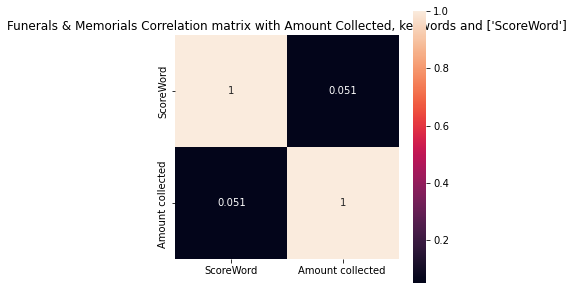

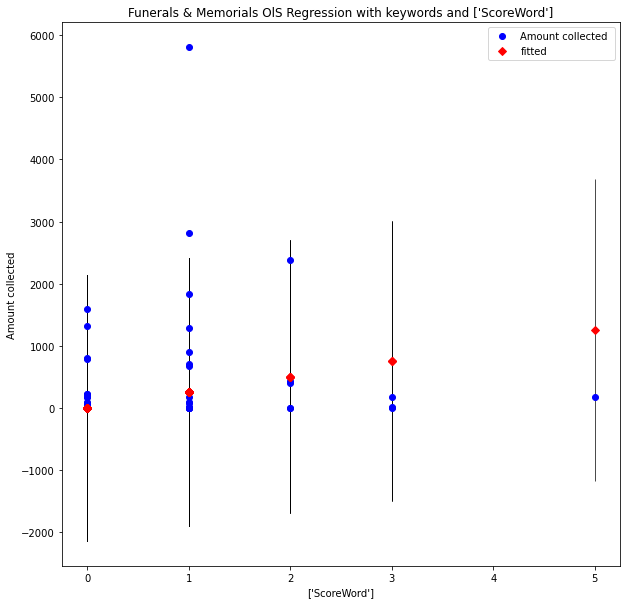

In [ ]:
OLS_per_category(dict_category[1],['ScoreWord'])

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              3.461
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                     0.00390
Time:                        09:37:44   Log-Likelihood:                         -247.88
No. Observations:                  49   AIC:                                      511.8
Df Residuals:                      41   BIC:                                      526.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

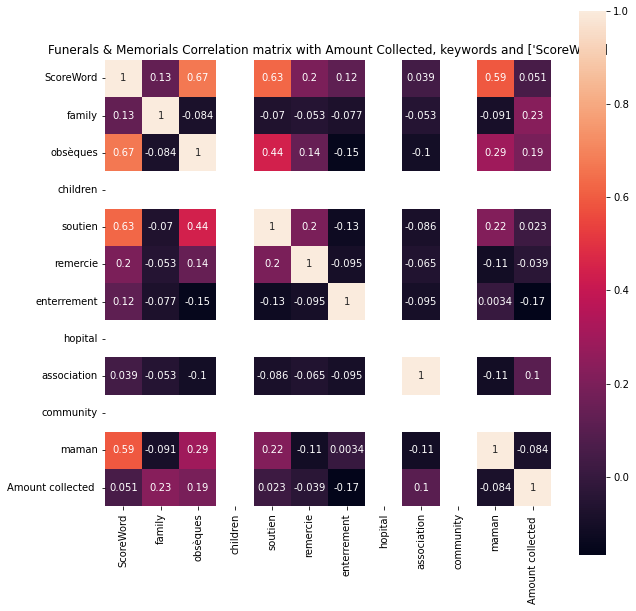

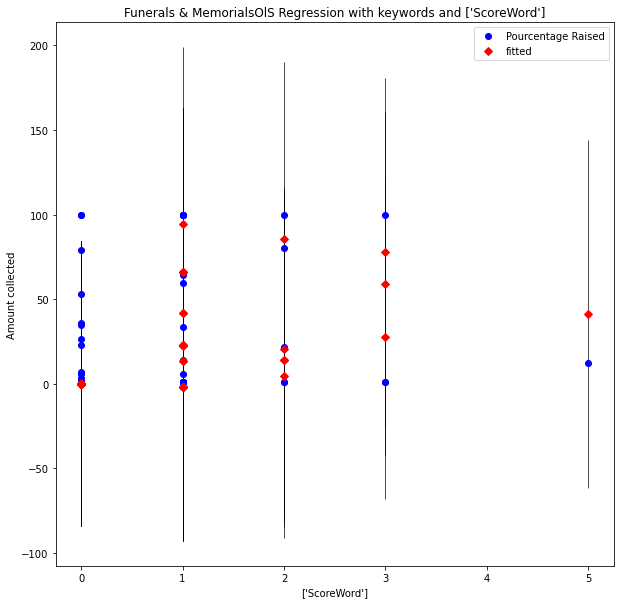

In [ ]:
OLS_per_category_with_keywords(dict_category[1],['ScoreWord'])

# APPENDIX 

### Run OLS for all categories:

Medical, Illness & Healing
                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.469
Model:                            OLS   Adj. R-squared (uncentered):              0.313
Method:                 Least Squares   F-statistic:                              3.012
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                     0.00418
Time:                        09:37:45   Log-Likelihood:                         -247.07
No. Observations:                  53   AIC:                                      518.1
Df Residuals:                      41   BIC:                                      541.8
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/s

                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.287
Method:                 Least Squares   F-statistic:                              3.461
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                     0.00390
Time:                        09:37:45   Log-Likelihood:                         -247.88
No. Observations:                  49   AIC:                                      511.8
Df Residuals:                      41   BIC:                                      526.9
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.515
Model:                            OLS   Adj. R-squared (uncentered):              0.388
Method:                 Least Squares   F-statistic:                              4.048
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                    0.000463
Time:                        09:37:46   Log-Likelihood:                         -286.67
No. Observations:                  53   AIC:                                      595.3
Df Residuals:                      42   BIC:                                      617.0
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.255
Model:                            OLS   Adj. R-squared (uncentered):              0.081
Method:                 Least Squares   F-statistic:                              1.469
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                       0.184
Time:                        09:37:46   Log-Likelihood:                         -233.30
No. Observations:                  53   AIC:                                      486.6
Df Residuals:                      43   BIC:                                      506.3
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.374
Model:                            OLS   Adj. R-squared (uncentered):              0.249
Method:                 Least Squares   F-statistic:                              2.991
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                     0.00704
Time:                        09:37:46   Log-Likelihood:                         -258.67
No. Observations:                  54   AIC:                                      535.3
Df Residuals:                      45   BIC:                                      553.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/var/folders/q4/80y3jscj6_50mb

                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.210
Model:                            OLS   Adj. R-squared (uncentered):              0.030
Method:                 Least Squares   F-statistic:                              1.170
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                       0.336
Time:                        09:37:46   Log-Likelihood:                         -195.89
No. Observations:                  54   AIC:                                      411.8
Df Residuals:                      44   BIC:                                      431.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/var/folders/q4/80y3jscj6_50mb

                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.040
Model:                            OLS   Adj. R-squared (uncentered):             -0.147
Method:                 Least Squares   F-statistic:                             0.2142
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                       0.987
Time:                        09:37:47   Log-Likelihood:                         -195.34
No. Observations:                  49   AIC:                                      406.7
Df Residuals:                      41   BIC:                                      421.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/s

                                 OLS Regression Results                                
Dep. Variable:     Pourcentage Raised   R-squared (uncentered):                   0.115
Model:                            OLS   Adj. R-squared (uncentered):             -0.003
Method:                 Least Squares   F-statistic:                             0.9775
Date:                Mon, 31 Jan 2022   Prob (F-statistic):                       0.451
Time:                        09:37:47   Log-Likelihood:                         -212.73
No. Observations:                  51   AIC:                                      437.5
Df Residuals:                      45   BIC:                                      449.1
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

/var/folders/q4/80y3jscj6_50mbqqrvpsf7h00000gn/T/ipykernel_2443/3401980376.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[keyword]=list
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


ValueError: zero-size array to reduction operation maximum which has no identity

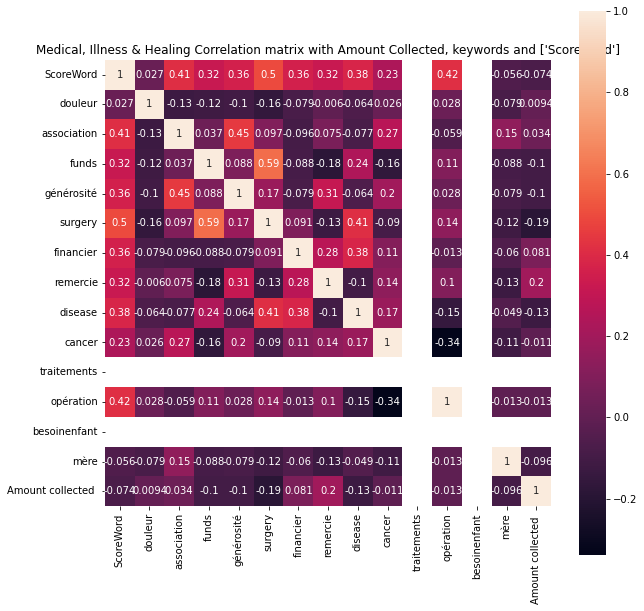

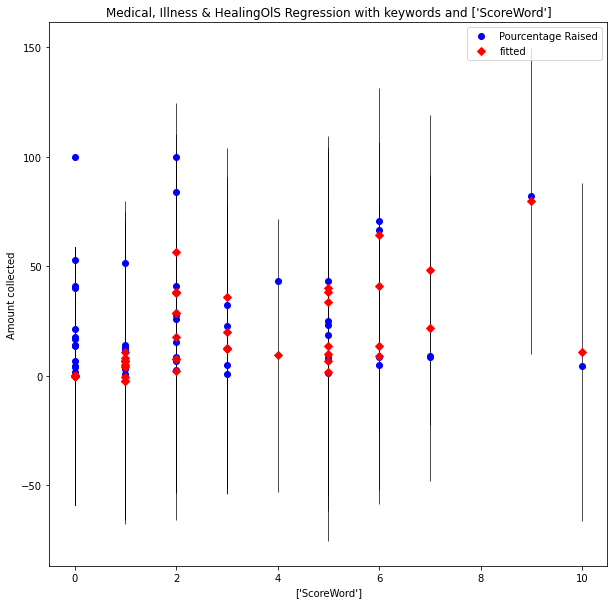

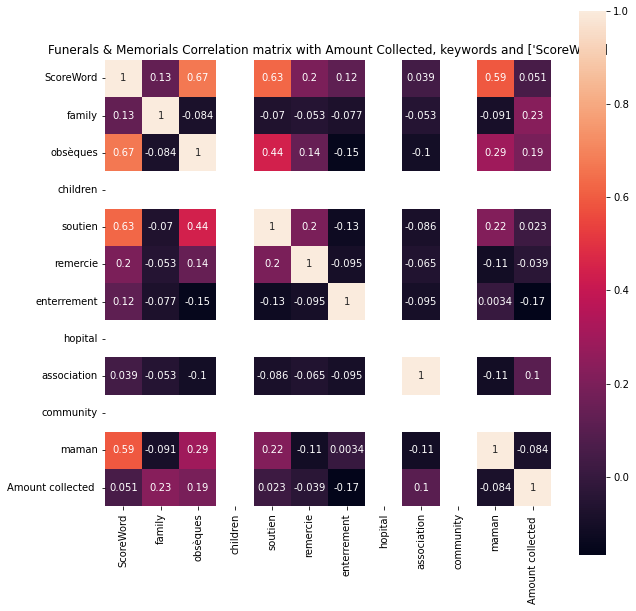

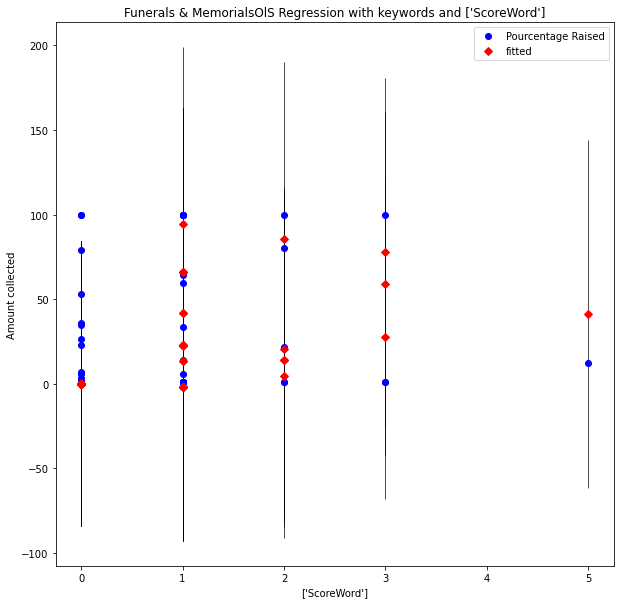

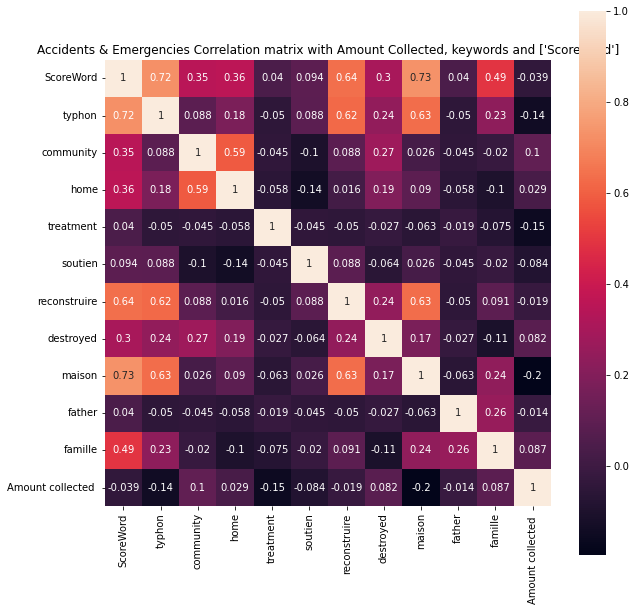

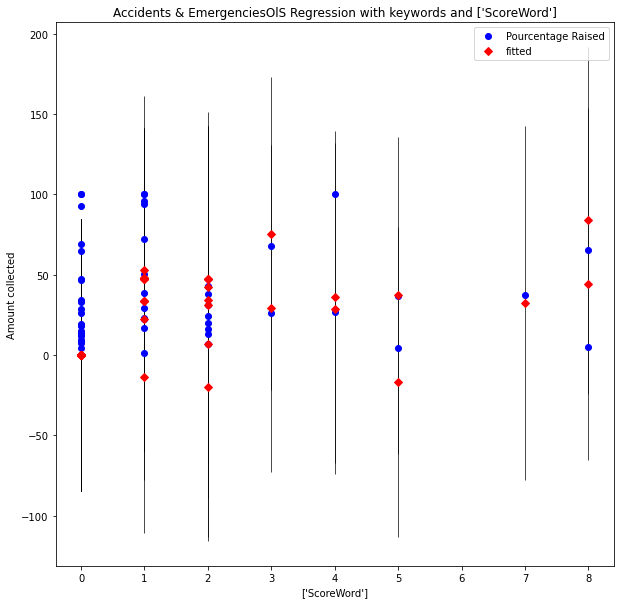

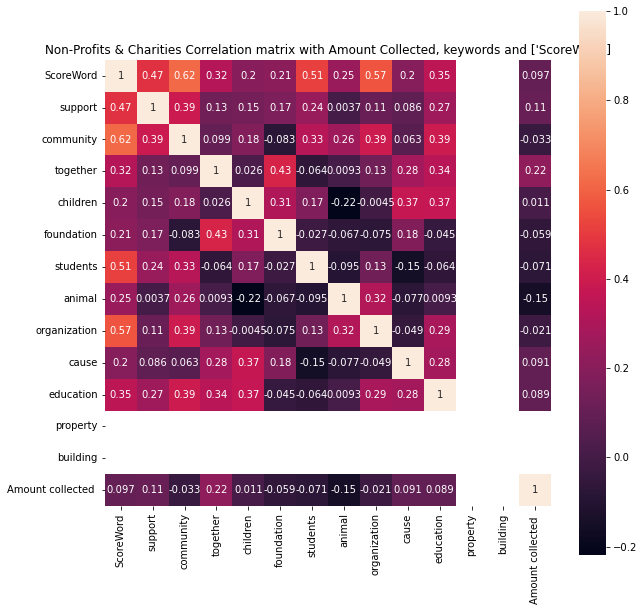

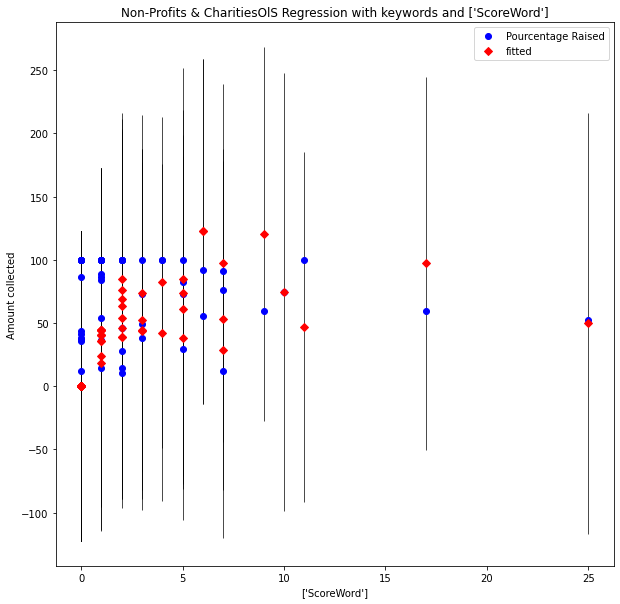

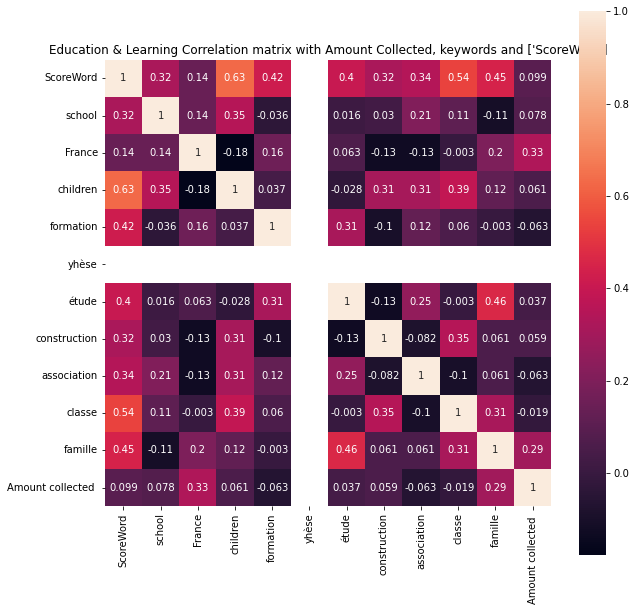

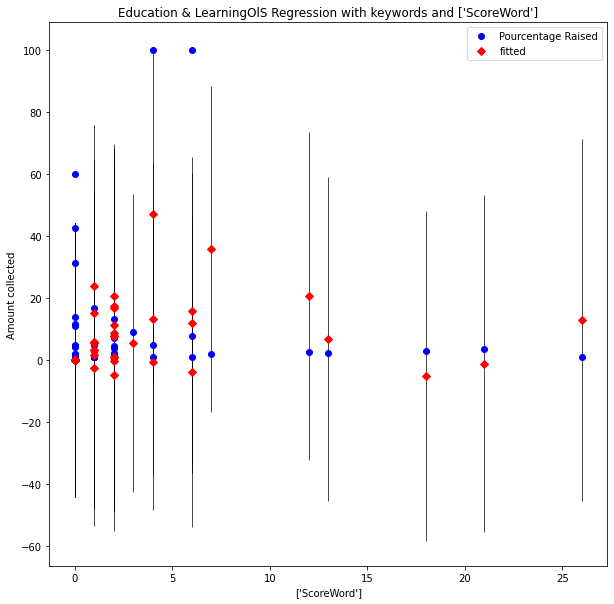

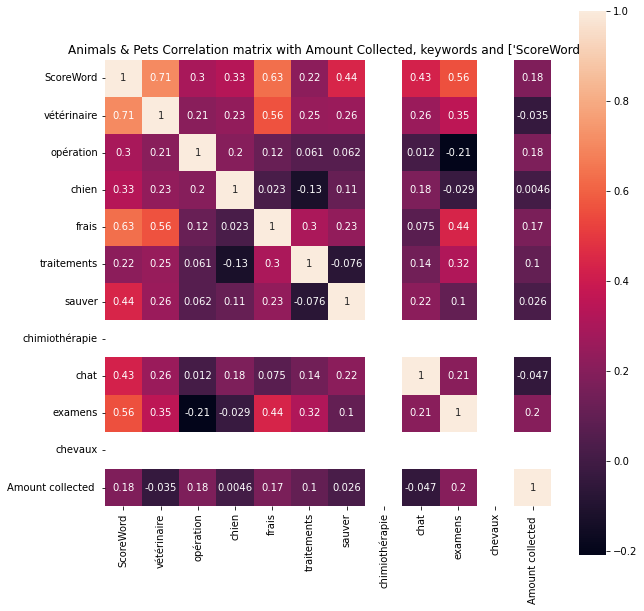

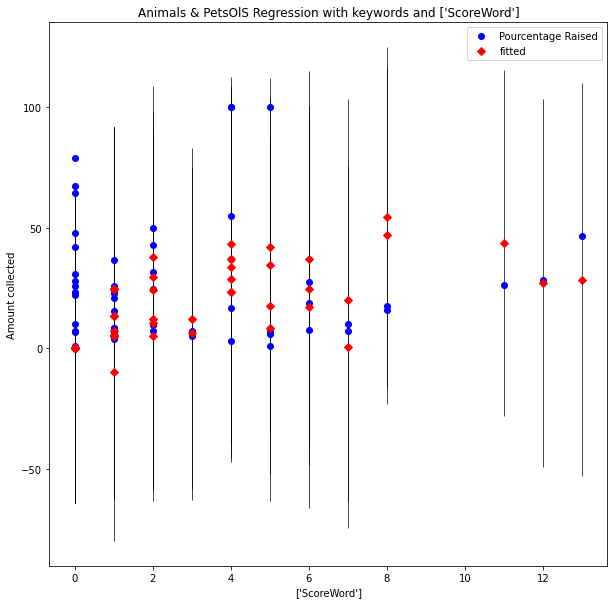

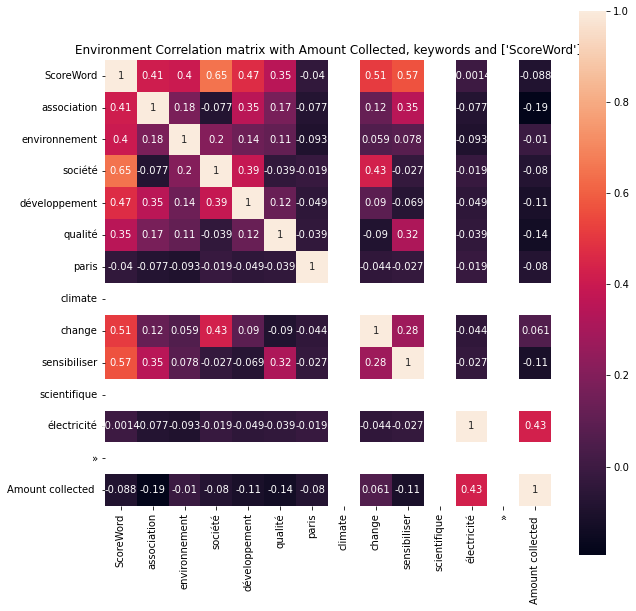

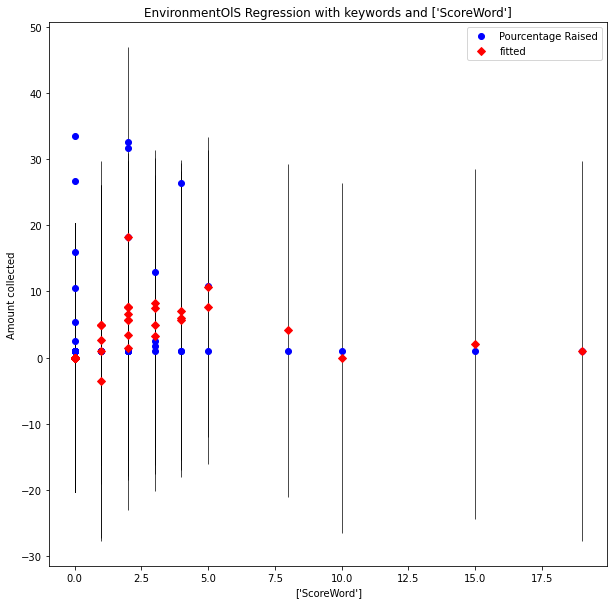

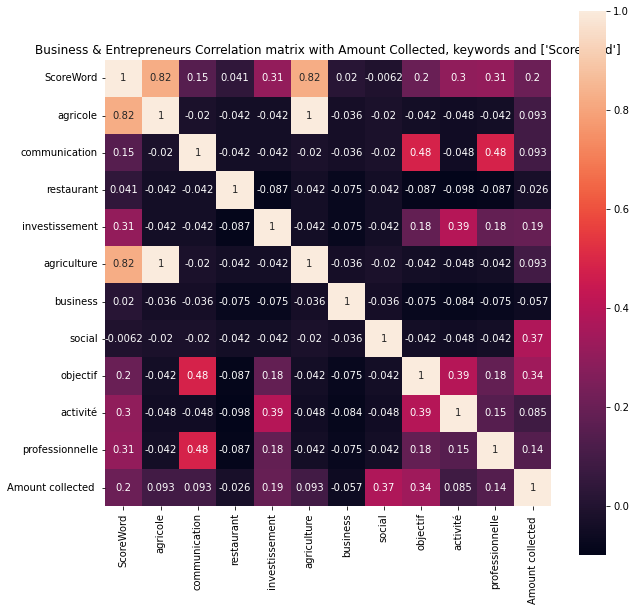

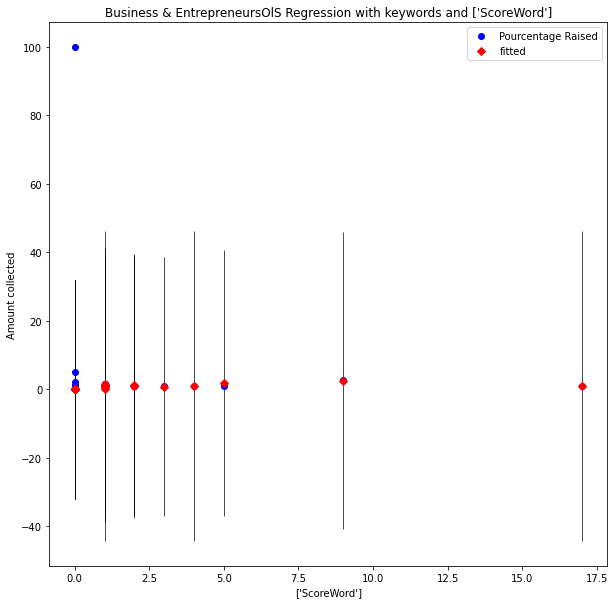

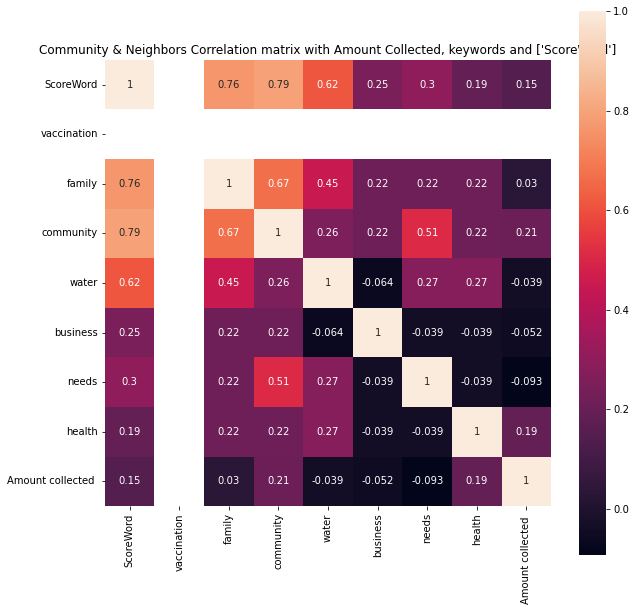

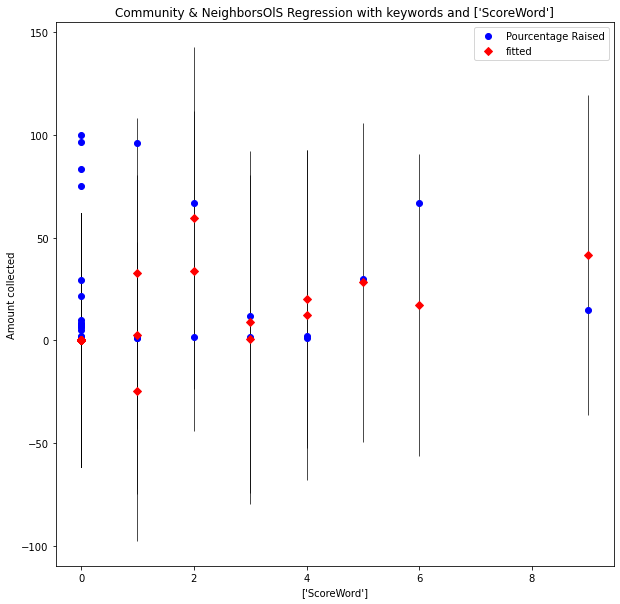

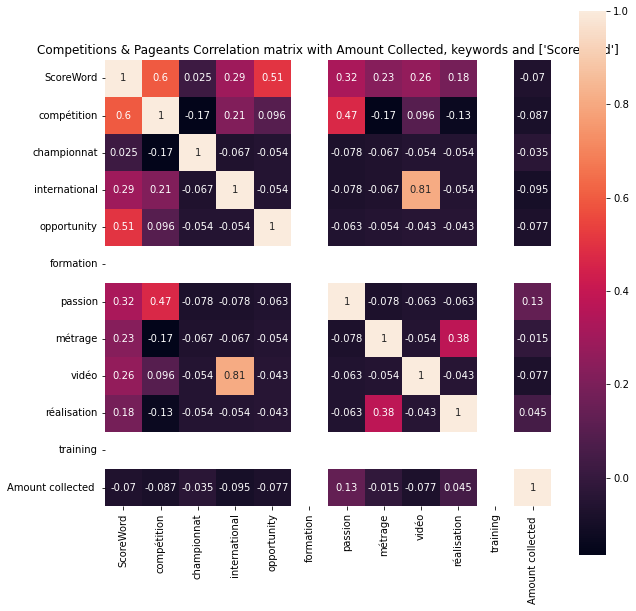

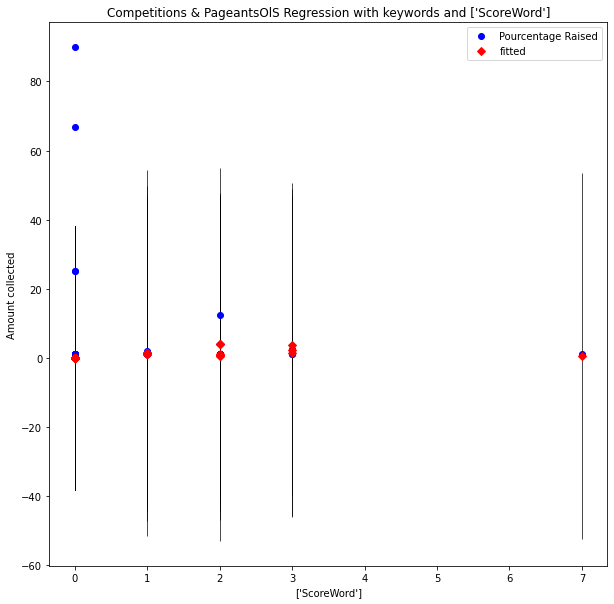

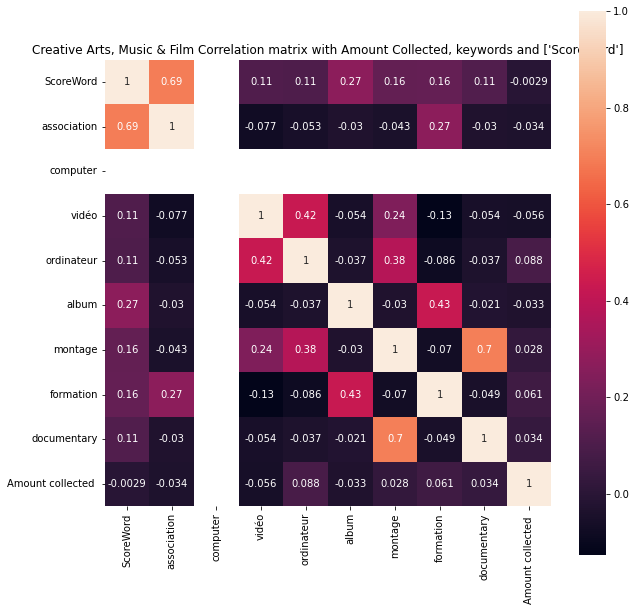

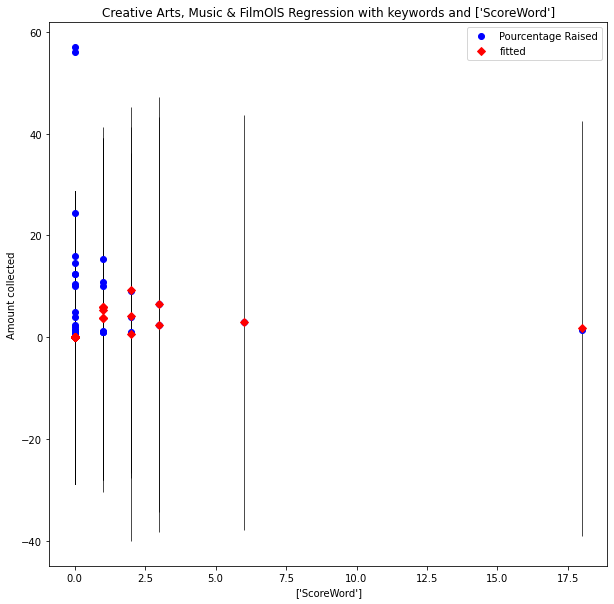

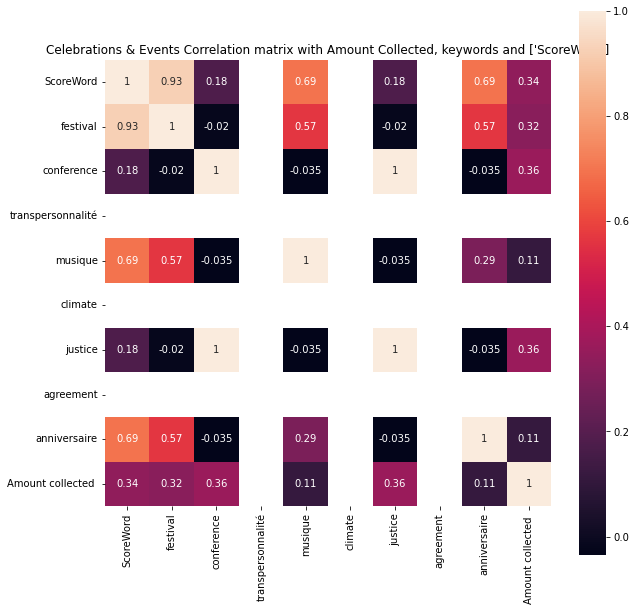

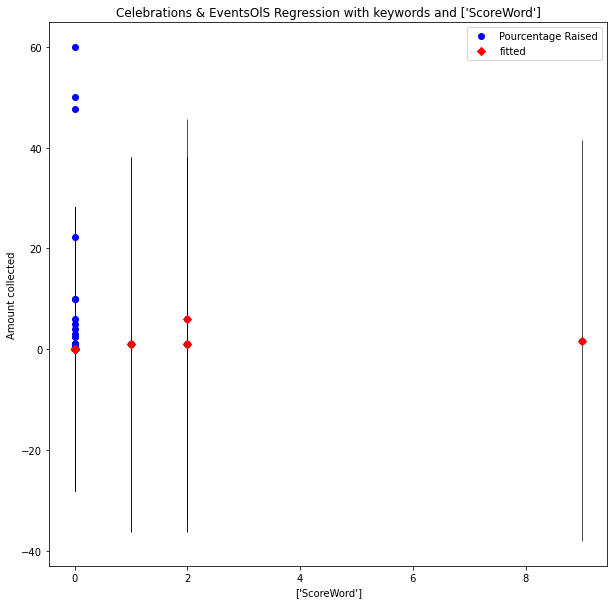

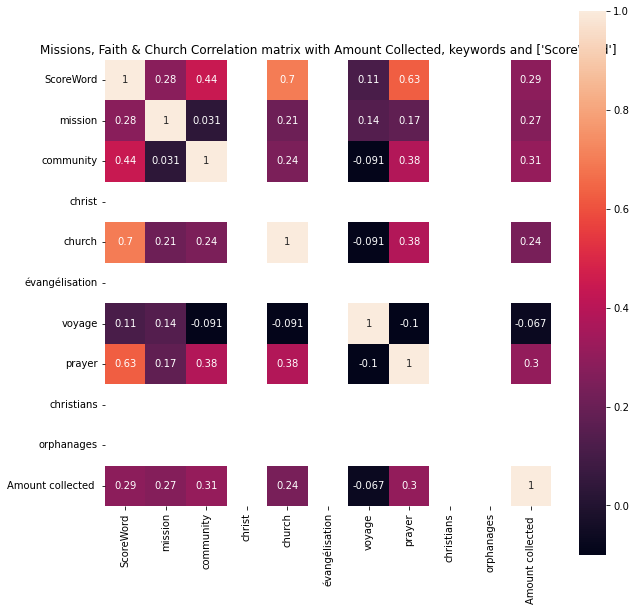

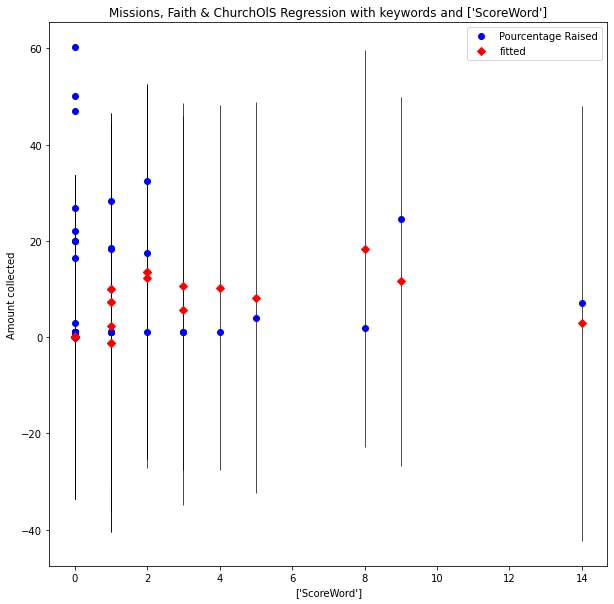

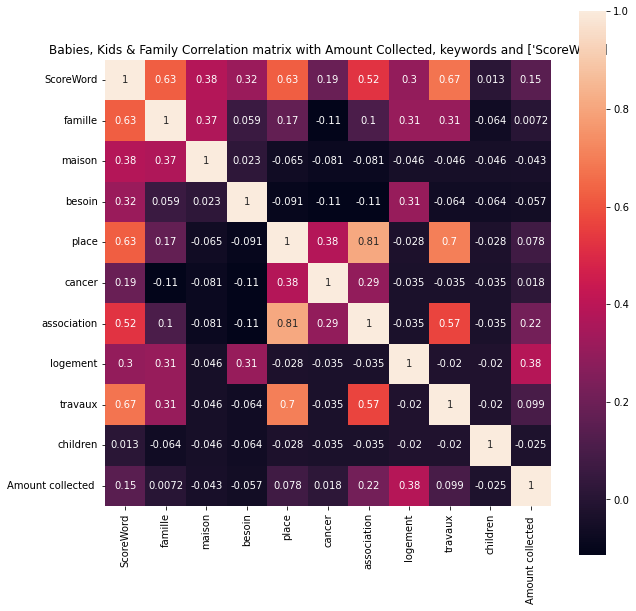

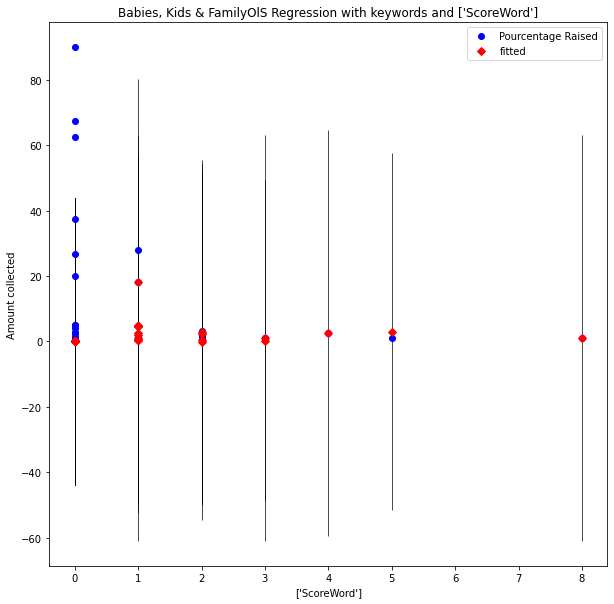

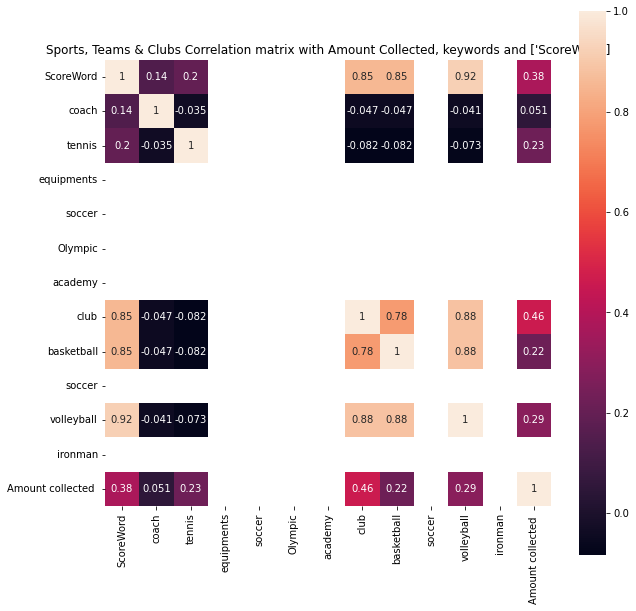

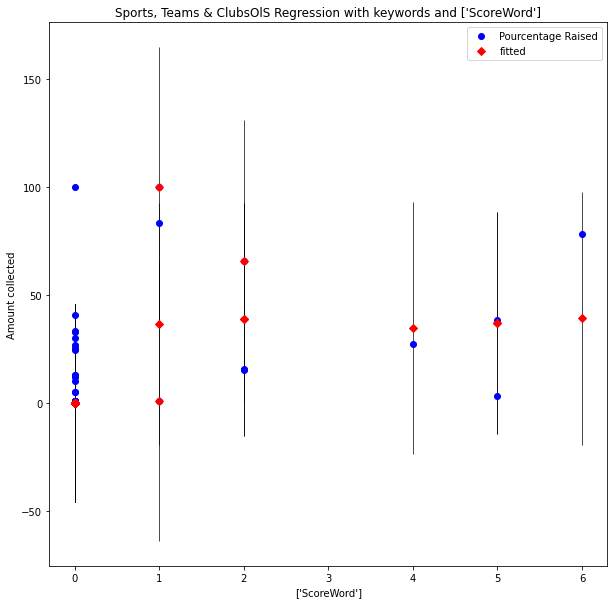

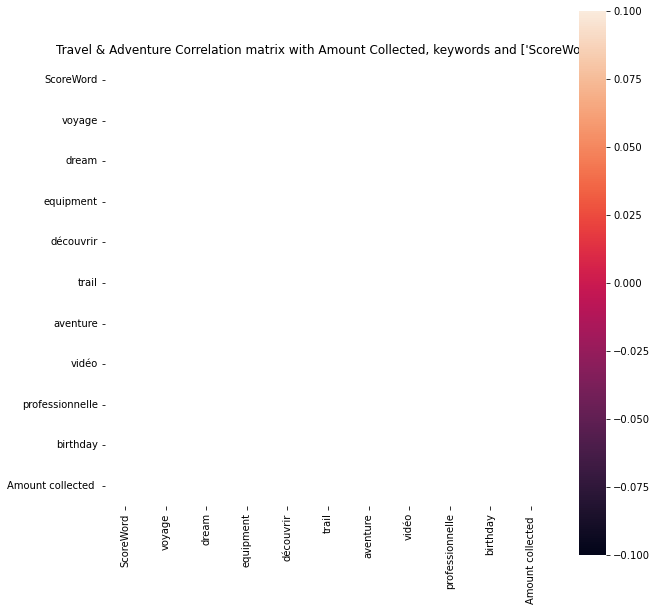

In [ ]:
for cat in catégorie:
    print(cat)
    OLS_per_category_with_keywords(cat,['ScoreWord'])